# COSC 3337 - Practice 4 - Ujwal Joshi

### About The Data
Our goal for this lab is construct a model that can take a certain set of housing features and give us back a price estimate. Since price is a continuous variable, linear regression may be a good place to start from.

The dataset that we'll be using for this task comes from [kaggle.com](https://www.kaggle.com/datasets/vedavyasv/usa-housing) and contains the following attributes:

- 'Avg. Area Income': Avg. income of residents of the city house is located in.
- 'Avg. Area House Age': Avg age of houses in same city
- 'Avg. Area Number of Rooms': Avg number of rooms for houses in same city
- 'Avg. Area Number of Bedrooms': Avg number of bedrooms for houses in same city
- 'Area Population': Population of city house is located in
- 'Price': Price that the house sold at (target)
- 'Address': Address for the house

### Exploratory Data Analysis

Let's begin by importing some necessary libraries that we'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Our first step is to load the data into a pandas DataFrame

In [3]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [4]:
# Modified Work
housing_data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\r\nEast Holly, NV..."


From here, it's always a good step to use `describe()` and `info()` to get a better sense of the data and see if we have any missing values.

In [5]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
# Modified Work
unique_vals_housing_data = pd.DataFrame({
    'Unique Value Count': housing_data.apply(lambda col: len(col.unique())),
    'Unique Values': housing_data.apply(lambda col: col.unique())
})

unique_vals_housing_data

,Unique Value Count,Unique Values
Avg. Area Income,5000,"[79545.45857431678, 79248.64245482568, 61287.0..."
Avg. Area House Age,5000,"[5.682861321615587, 6.0028998082752425, 5.8658..."
Avg. Area Number of Rooms,5000,"[7.009188142792237, 6.730821019094919, 8.51272..."
Avg. Area Number of Bedrooms,255,"[4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.4..."
Area Population,5000,"[23086.800502686456, 40173.07217364482, 36882...."
Price,5000,"[1059033.5578701235, 1505890.91484695, 1058987..."
Address,5000,"[208 Michael Ferry Apt. 674\r\nLaurabury, NE 3..."


The info below lets us know that we have 5,000 entries and 5,000 non-null values in each feature/column. Therefore, there are no missing values in this dataset.

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
# Modified Work
housing_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

A quick pairplot lets us get an idea of the distributions and relationships in our dataset. From here, we could choose any interesting features that we'd like to later explore in greater depth. ***Warning: The more features in our dataset, the harder our pairplot will be to interpret.***

c:\Users\Ujwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


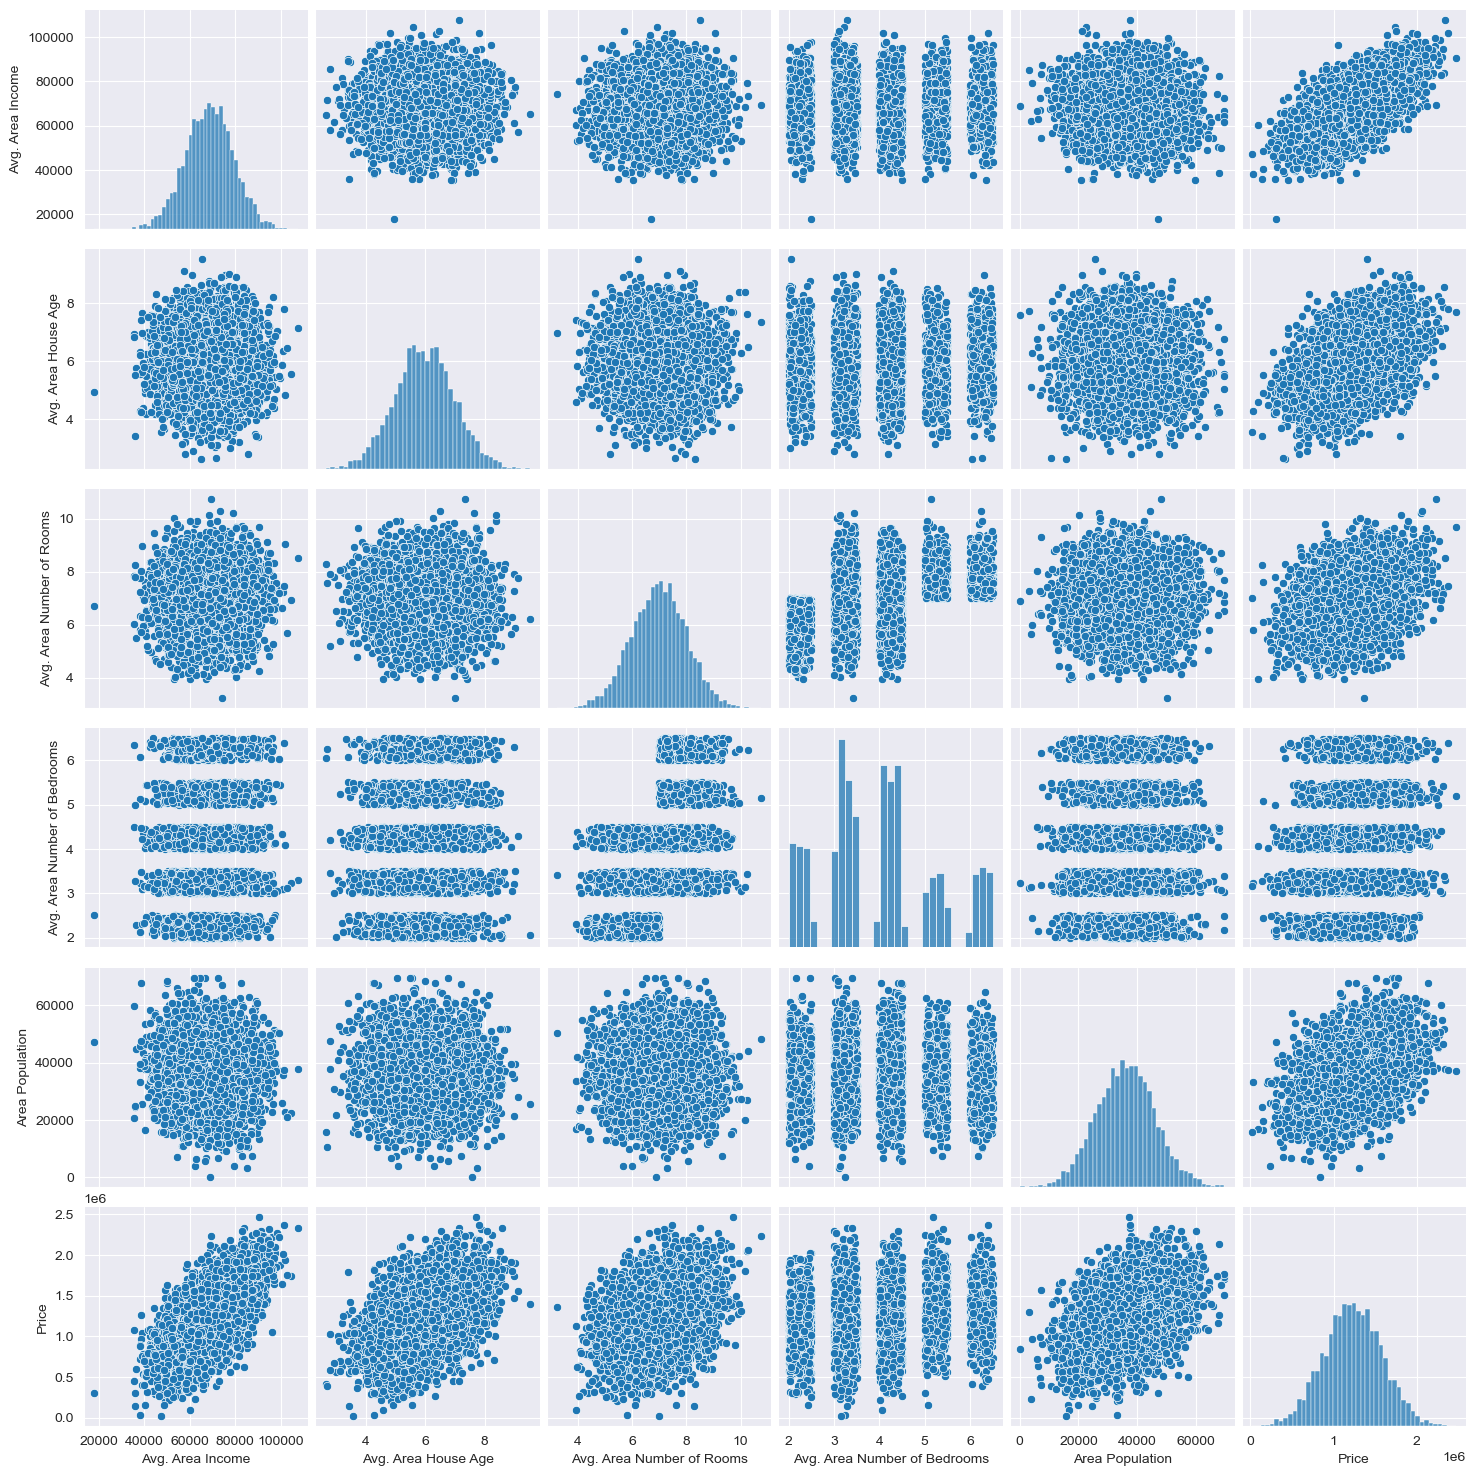

In [7]:
sns.pairplot(housing_data)
plt.show()

c:\Users\Ujwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


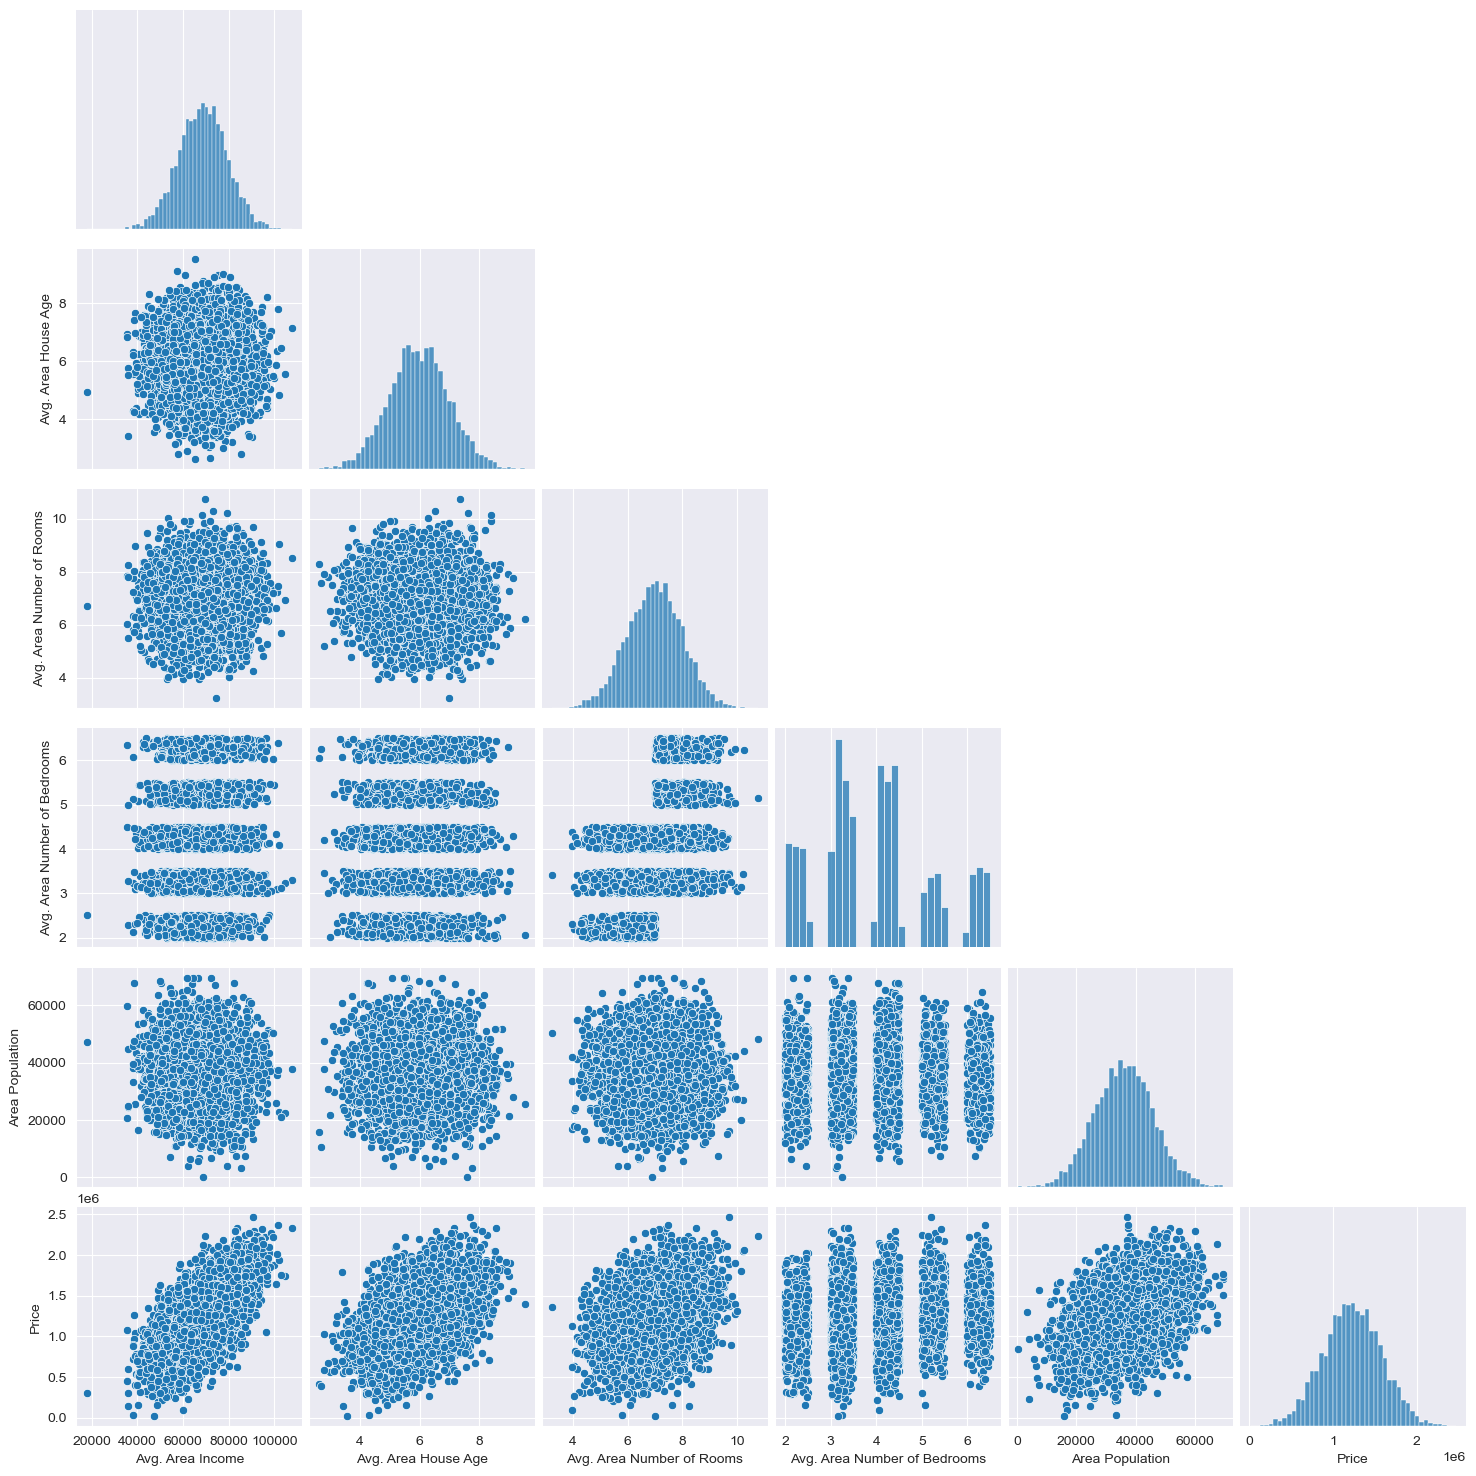

In [5]:
# Modified Work
sns.pairplot(housing_data, corner=True)
plt.show()

Taking a closer look at price, we see that it's normally distributed with a peak around 1.232073e+06, and 75% of houses sold were at a price of 1.471210e+06 or lower.

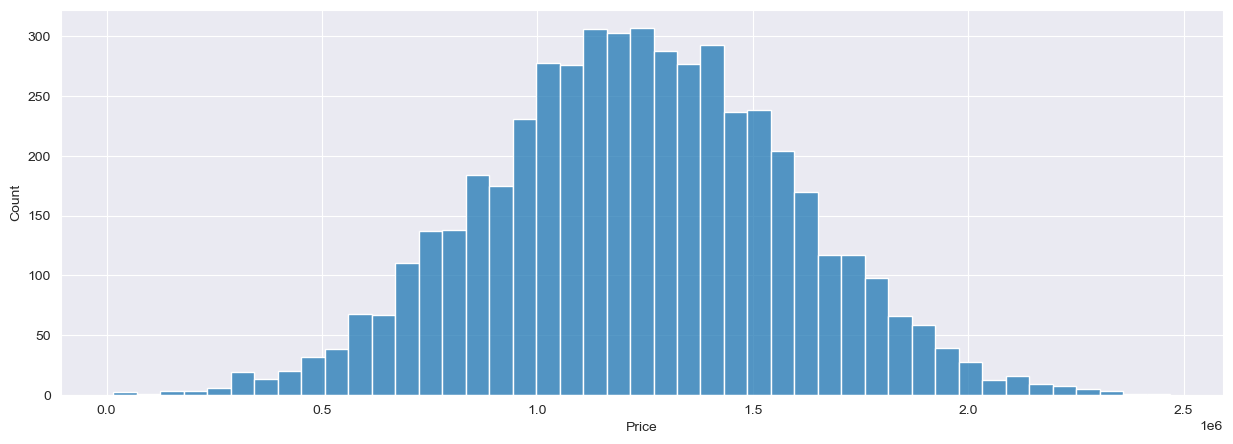

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [6]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

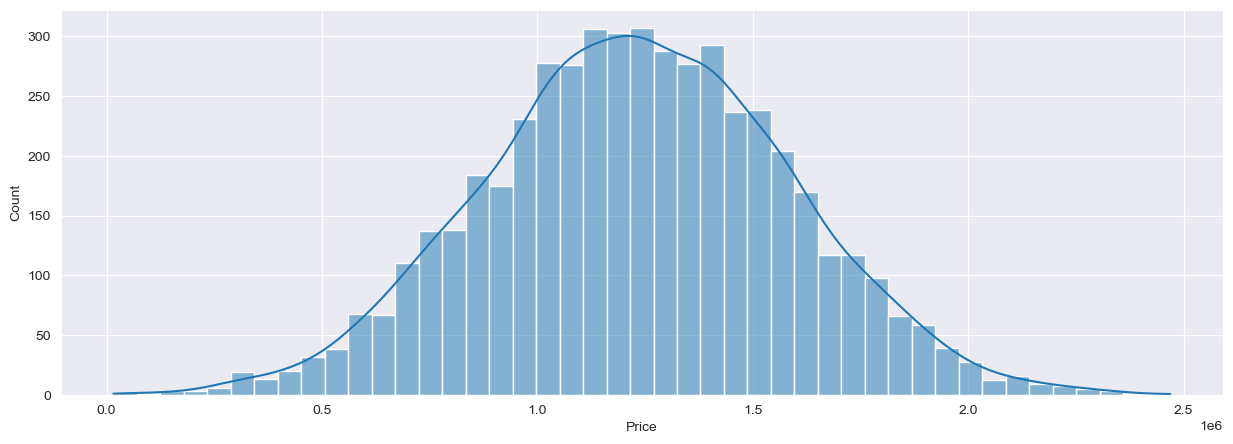

In [9]:
# Modified Work
sns.histplot(housing_data['Price'], kde=True)
plt.show()

A scatterplot of Price vs. Avg. Area Income shows a strong positive linear relationship between the two.

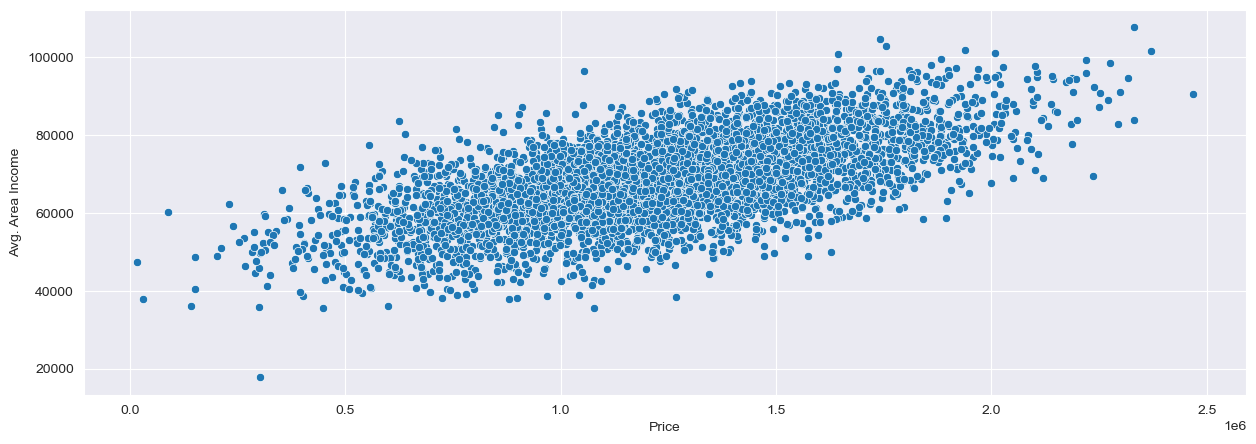

In [10]:
sns.scatterplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

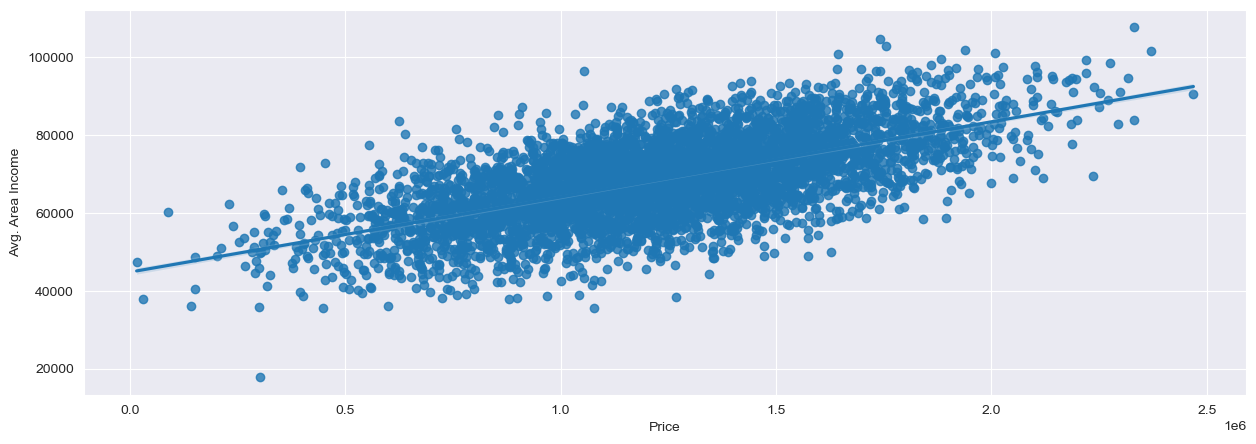

In [19]:
# Modified Work
sns.regplot(data=housing_data, x='Price', y='Avg. Area Income')
plt.show()

Creating a boxplot of Avg. Area Number of Bedrooms lets us see that the median average area number of bedrooms is around 4, with a minimum of 2 and max of around 6.5. We can also so that there are no outliers present.

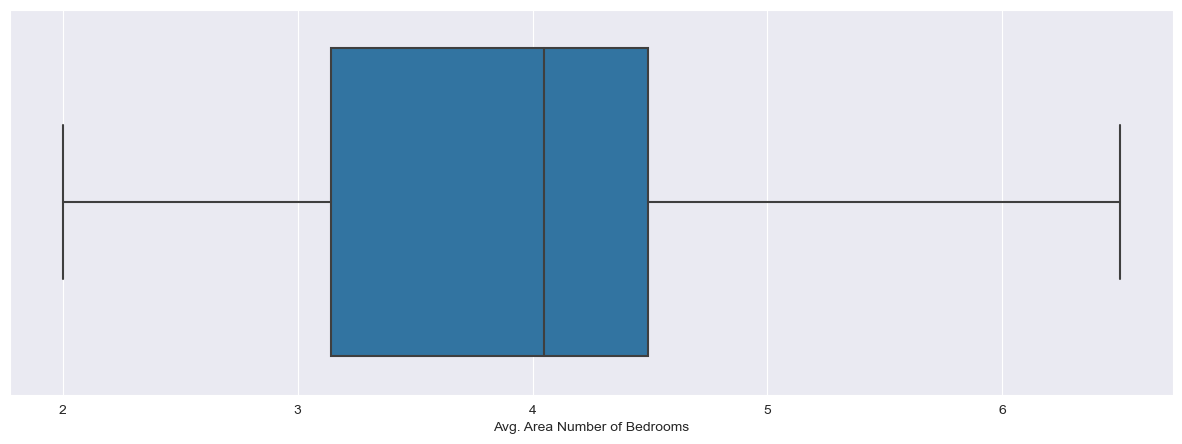

In [20]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

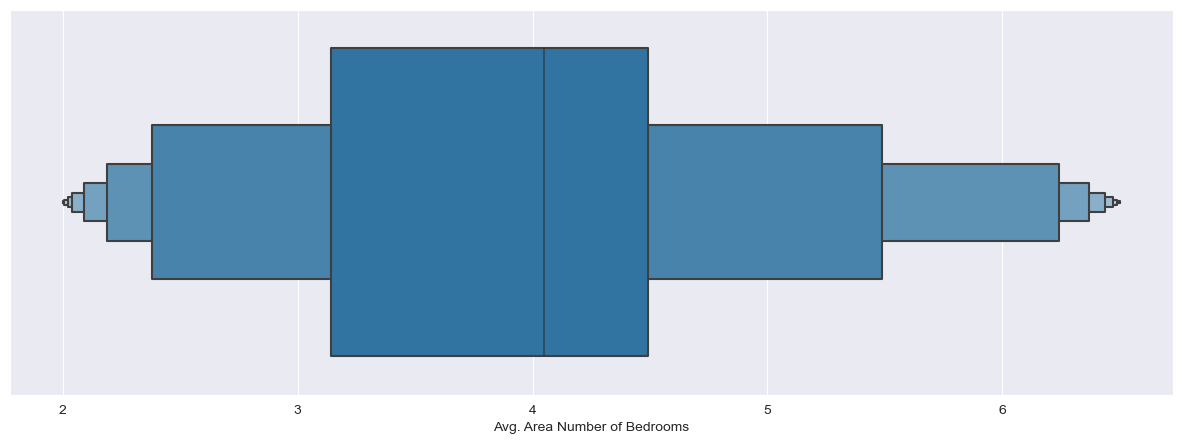

In [21]:
# Modified Work
sns.boxenplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

Try plotting some of the other features for yourself to see if you can discover some interesting findings. Refer back to the matplotlib lab if you're having trouble creating any graphs.

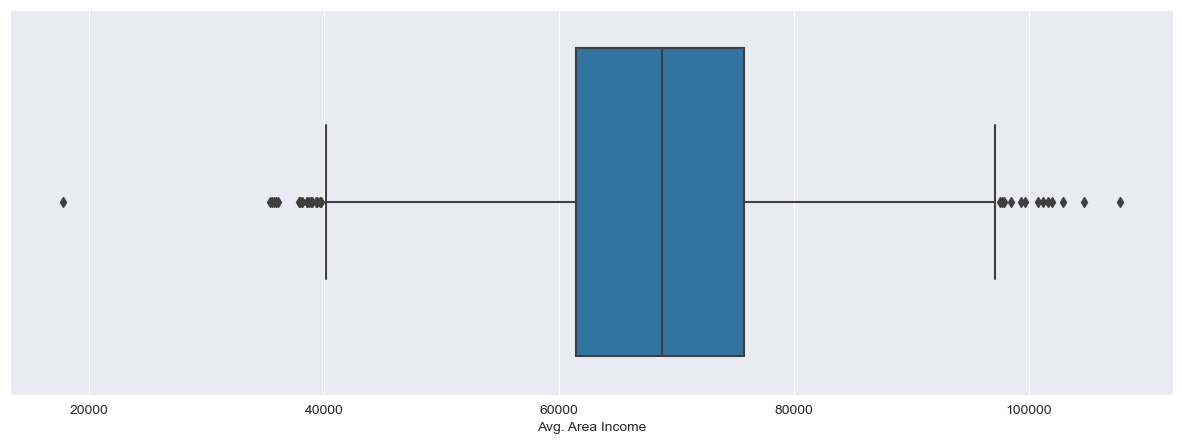

In [22]:
# Modified Work
sns.boxplot(x='Avg. Area Income', data=housing_data)
plt.show()

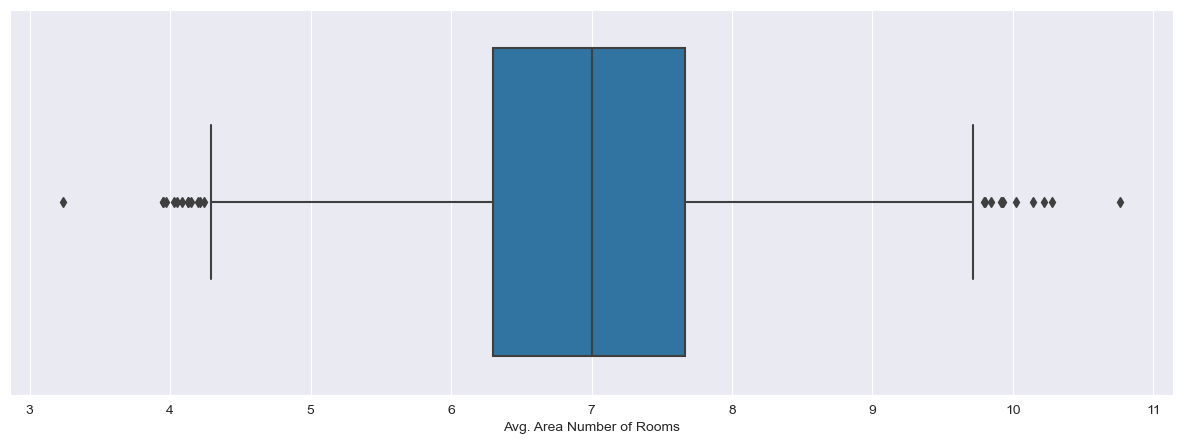

In [24]:
# Modified Work
sns.boxplot(x='Avg. Area Number of Rooms', data=housing_data)
plt.show()

Neither Avg. Area Number of Rooms or Avg. Area Income seem to be skewed left or right, both have outliers.

Another important thing to look for while we're exploring our data is multicollinearity. Multicollinearity means that several variables are essentially measuring the same thing. Not only is there no point to having more than one measure of the same thing in a model, but doing so can actually cause our model results to fluctuate. Luckily, checking for multicollinearity can be done easily with the help of a heatmap. ***Note: Depending on the situation, it may not be a problem for your model if only slight or moderate collinearity issue occur. However, it is strongly advised to solve the issue if severe collinearity issue exists(e.g. correlation >0.8 between 2 variables)***

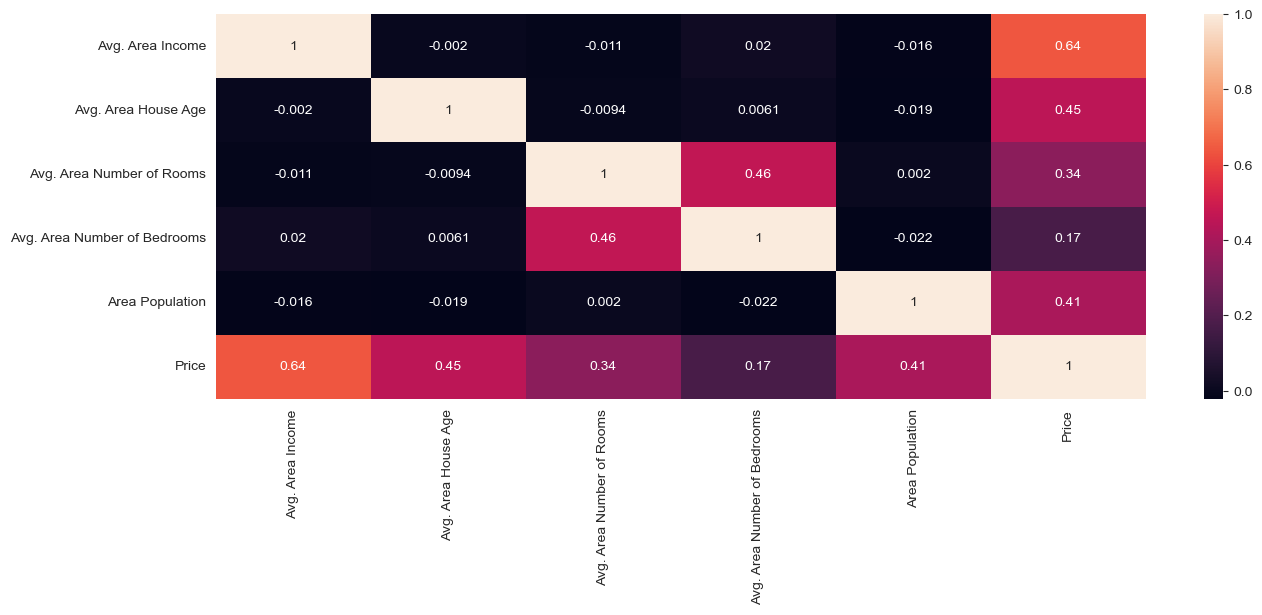

In [27]:
housing_df_numeric = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]

sns.heatmap(housing_df_numeric.corr(), annot=True)
plt.show()

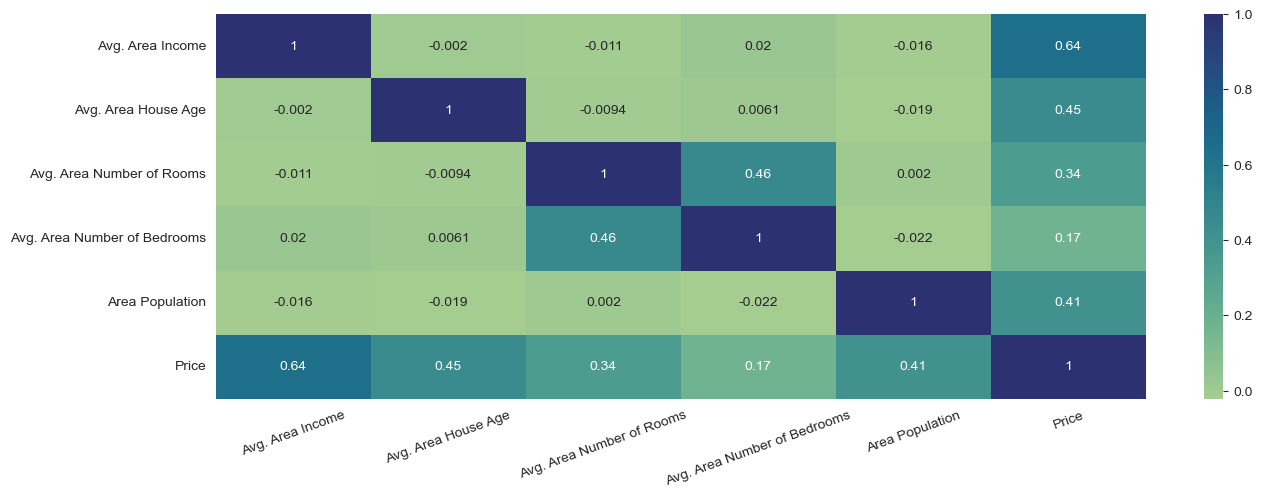

In [31]:
# Modified Work
sns.heatmap(housing_df_numeric.corr(), annot=True, cmap="crest")
plt.xticks(rotation=20)
plt.show()

This dataset is quite clean, and so there's no severe collinearity issues. We'll later dive into some messier datasets which will require some type of feature engineering or PCA to resolve.

### Creating Our Linear Model

We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's `train_test_split(X, y, test_size)` function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [32]:
from sklearn.model_selection import train_test_split

X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
                  'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
# Modified Work (trying out 80 20 split)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2)

We'll now import sklearn's LinearRegression model and begin training it using the `fit(train_data, train_data_labels)` method. In a nutshell, fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a `predict(test_data)` method call. You can think of fit as the step that finds the coefficients for the equation.

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
# Modified Work
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

LinearRegression()

### Model Evaluation

Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels (y_test).

To get a rough idea of how well the model is predicting, we can make a scatterplot with the true test labels (y_test) on the x-axis, and our predictions on the y-axis. Ideally, we'd like a 45 degree line. The straighter the line, the better our predictions are.

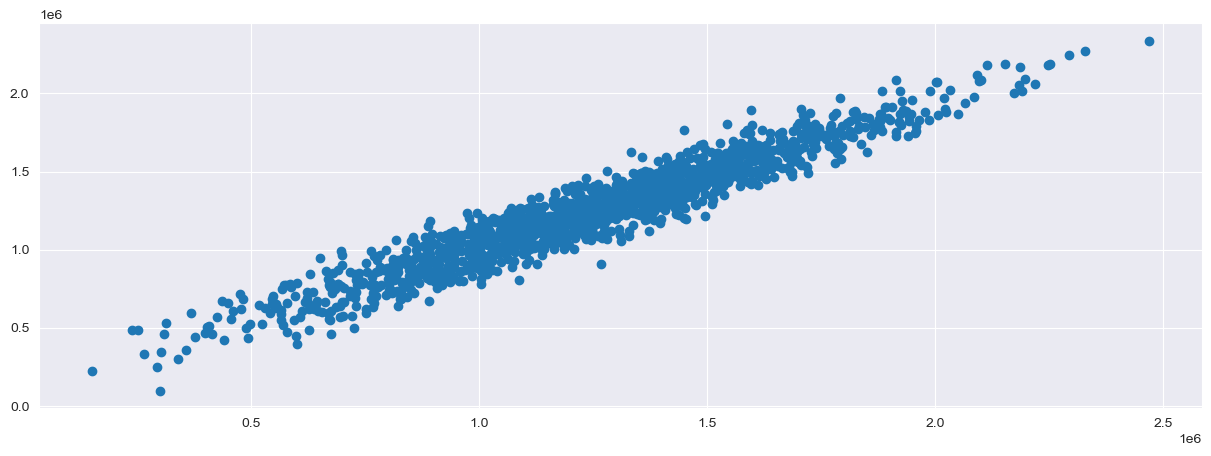

In [37]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

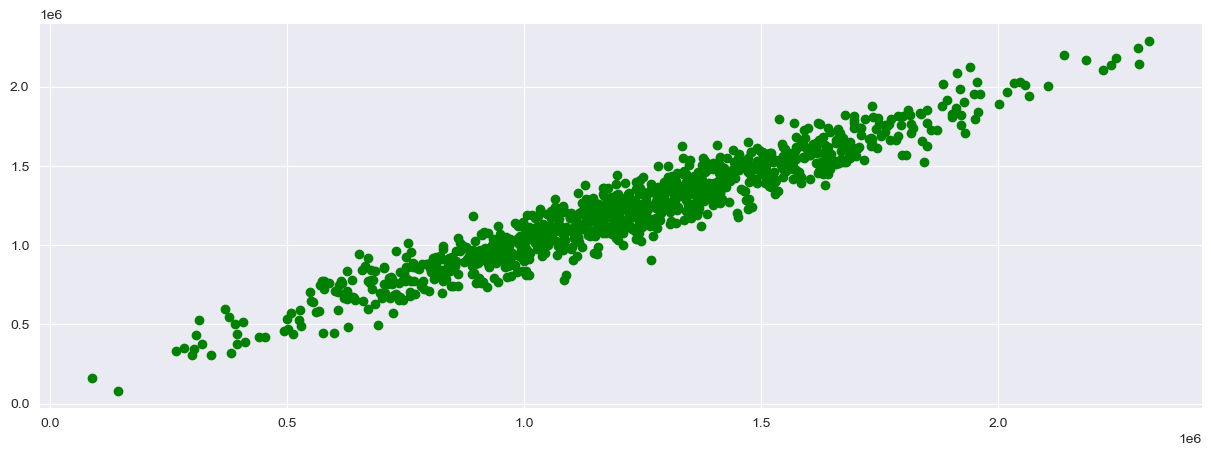

In [40]:
# Modified Work
predictions2 = lm2.predict(X2_test)
plt.scatter(y2_test, predictions2, color='green')
plt.show()

Something that you may recall from MATH 3339 is that we'd like to see the residuals be normally distributed in regression analysis. We can exam this as follows:

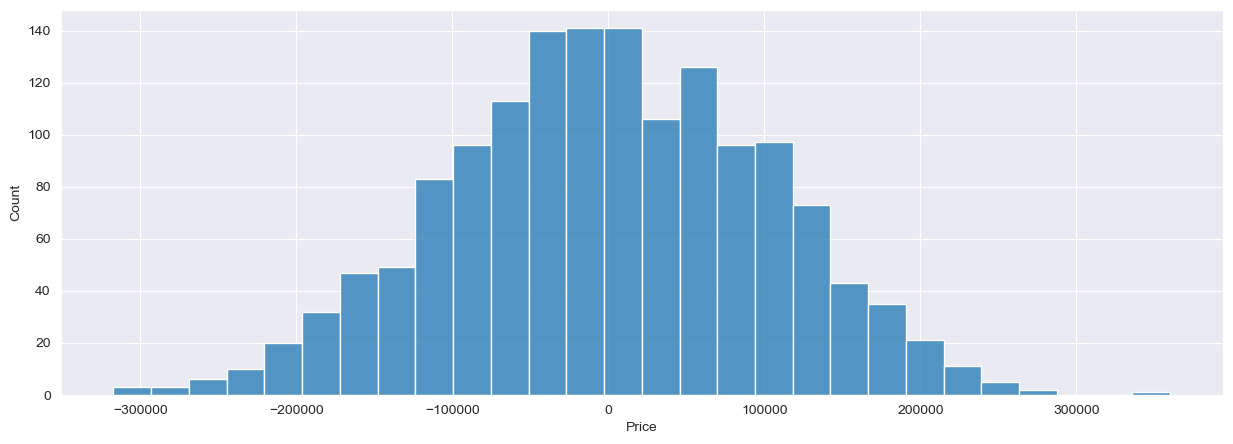

In [41]:
residuals = y_test - predictions
sns.histplot(residuals)
plt.show()

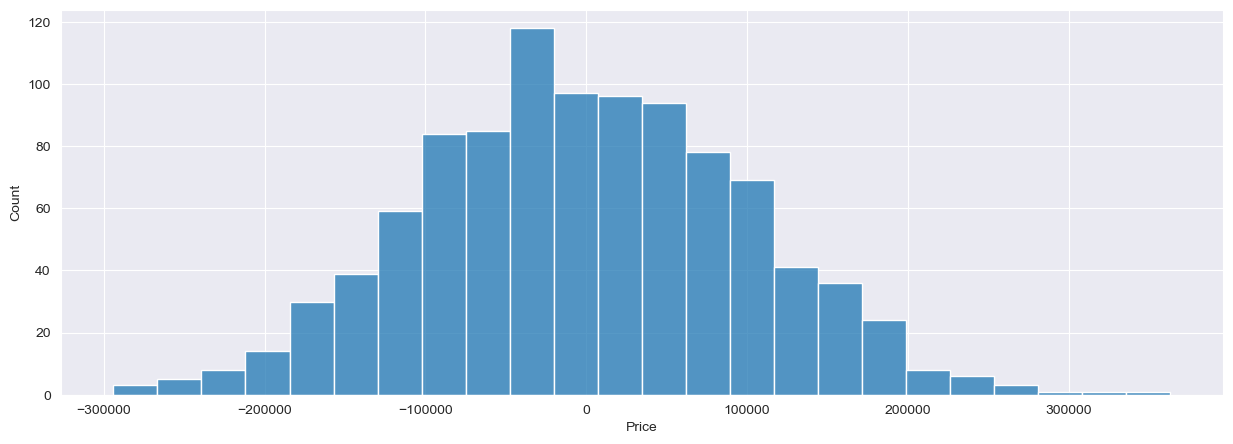

In [42]:
# Modified Work
residuals2 = y2_test - predictions2
sns.histplot(residuals2)
plt.show()

Here are the most common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$\frac{1}{n}\sum\limits^{n}_{i=1}|y_i-\hat{y}_i|$$

Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac{1}{n}\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2$$

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n}\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2}$$  

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.  

All of these are **loss functions**, because we want to minimize them.  

Luckily, sklearn can calculate all of these metrics for us. All we need to do is pass the true labels (y_test) and our predictions to the functions below. What's more important is that we understand what each of these means. Root Mean Square Error (RMSE) is what we'll most commonly use, which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit. Determining a good RMSE depends on your data. You can find a great example [here](https://stackoverflow.com/questions/57348495/what-is-the-good-rmse-root-mean-square-error-value-range-to-justify-the-effici), or refer back to the power points.

In [43]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82176.21791733803
MSE: 10360145166.503954
RMSE: 101784.79830752702


In [44]:
# Modified Work
print('(2) MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('(2) MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('(2) RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

(2) MAE: 80796.9444067913
(2) MSE: 10111948437.886309
(2) RMSE: 100558.18434064086


Something we also like to look at is the coefficient of determination ($R^2$), which is the percentage of variation in y explained by all the x variables together. Usually an $R^2$ of .70 is considered good.

In [45]:
from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(y_test, predictions))

R2 Score:  0.918187379291186


In [46]:
# Modified Work
print('(2) R2 Score: ', r2_score(y2_test, predictions2))

(2) R2 Score:  0.9195021120681839


Finally, let's see how we can interpret our model's coefficients. We can access the coefficients by calling `coef_` on our linear model (lm in this case). We'll use this and put it in a nice pandas DataFrame for visual purposes. Note: You can also call `intercept_` if you'd like to get the intercept.

In [47]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.582893
Avg. Area House Age,165189.185007
Avg. Area Number of Rooms,120410.668559
Avg. Area Number of Bedrooms,1570.256964
Area Population,15.240319


What these coefficients mean:

- Holding all other features fixed, a 1 unit increase in `Avg. Area Income` is associated with an increase of **$21.564645**.
- Holding all other features fixed, a 1 unit increase in `Avg. Area House Age` is associated with an increase of **$166102.423648**.
- Holding all other features fixed, a 1 unit increase in `Avg. Area Number of Rooms` is associated with an increase of **$122398.915857**.
- Holding all other features fixed, a 1 unit increase in `Avg. Area Number of Bedrooms` is associated with an increase of **$887.665746**.
- Holding all other features fixed, a 1 unit increase in `Area Population` is associated with an increase of **$15.309706**.

Congratulations! You now know how to create and evaluate linear models using sklearn. As extra practice, I'd recommend now trying to find a used car or similar housing dataset on [kaggle.com](https://www.kaggle.com/) and use this notebook as a guide.

In [48]:
# Modified Work
coeff2_df = pd.DataFrame(lm2.coef_, X.columns, columns=['Coefficient'])
coeff2_df

,Coefficient
Avg. Area Income,21.592166
Avg. Area House Age,166076.480964
Avg. Area Number of Rooms,120782.355821
Avg. Area Number of Bedrooms,1456.136368
Area Population,15.189465


- Holding all other features fixed, a 1 unit increase in `Avg. Area Income` is associated with an increase of **$21.592166**.
- Holding all other features fixed, a 1 unit increase in `Avg. Area House Age` is associated with an increase of **$166076.480964**.
- Holding all other features fixed, a 1 unit increase in `Avg. Area Number of Rooms` is associated with an increase of **$120782.355821**.
- Holding all other features fixed, a 1 unit increase in `Avg. Area Number of Bedrooms` is associated with an increase of **$1456.136368**.
- Holding all other features fixed, a 1 unit increase in `Area Population` is associated with an increase of **$15.189465**.  

(in the 80 20 split model, the coefficient for `Avg. Area Number of Bedrooms` increased significantly).